### Import Dependencies

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt

### Data Loading 

In [2]:
df =pd.read_csv("CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152.0,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109.0,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136.0,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
# shape of dataframe
df.shape

(205, 26)

In [4]:
# dtypes and null value count of column 
df.info()
'''
The null values present in fueltype,enginesize,fuelsystem and price.
Data types are correcly assigned.
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          189 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        204 non-null    float64
 1

'\nThe null values present in fueltype,enginesize,fuelsystem and price.\nData types are correcly assigned.\n'

In [5]:
# Five Point Summary
'''
compressionratio and price are highly skewed feature
'''
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,204.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,202.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.862745,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13306.760728
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.740233,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7985.699087
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7823.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10320.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,142.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16502.250000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
df.skew()

car_ID              0.000000
symboling           0.211072
wheelbase           1.050214
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
enginesize          1.946838
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
citympg             0.663704
highwaympg          0.539997
price               1.796408
dtype: float64

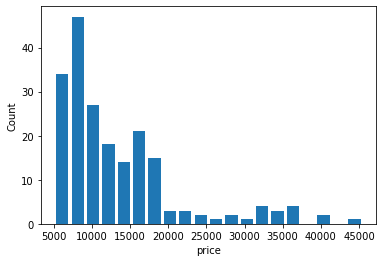

In [7]:
# histogram for target variable price
plt.hist(df.price,bins=20,rwidth=0.8)
plt.xlabel('price')
plt.ylabel('Count')
plt.show()

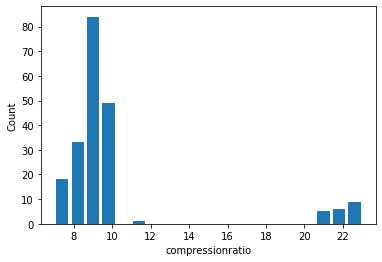

In [8]:
# histogram for compressionratio
plt.hist(df.compressionratio,bins=20,rwidth=0.8)
plt.xlabel('compressionratio')
plt.ylabel('Count')
plt.show()

### Data Cleaning 

#### 1. Missing values

In [9]:
df.isnull().sum()

car_ID               0
symboling            0
CarName              0
fueltype            16
aspiration           0
doornumber           0
carbody              0
drivewheel           0
enginelocation       0
wheelbase            0
carlength            0
carwidth             0
carheight            0
curbweight           0
enginetype           0
cylindernumber       0
enginesize           1
fuelsystem          14
boreratio            0
stroke               0
compressionratio     0
horsepower           0
peakrpm              0
citympg              0
highwaympg           0
price                3
dtype: int64

In [10]:
df.isnull().sum()/df.shape[0]*100

car_ID              0.000000
symboling           0.000000
CarName             0.000000
fueltype            7.804878
aspiration          0.000000
doornumber          0.000000
carbody             0.000000
drivewheel          0.000000
enginelocation      0.000000
wheelbase           0.000000
carlength           0.000000
carwidth            0.000000
carheight           0.000000
curbweight          0.000000
enginetype          0.000000
cylindernumber      0.000000
enginesize          0.487805
fuelsystem          6.829268
boreratio           0.000000
stroke              0.000000
compressionratio    0.000000
horsepower          0.000000
peakrpm             0.000000
citympg             0.000000
highwaympg          0.000000
price               1.463415
dtype: float64

##### Missing values Treatment for fueltype

gas       169
diesel     20
Name: fueltype, dtype: int64
0    gas
dtype: object


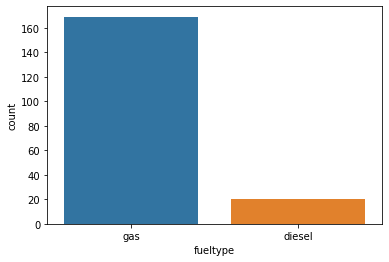

In [11]:
# fueltype is categorical attribute thus we can replace missing values with mode of fueltype
print(df.fueltype.value_counts())
sns.countplot(df.fueltype)
print(df.fueltype.mode())

In [12]:
df.fueltype.fillna("gas",inplace=True)

In [13]:
df.fueltype.isnull().value_counts()

False    205
Name: fueltype, dtype: int64

##### Missing values treatment for enginesize

In [14]:
#  enginesize attribute consist only single null value thus we can remove it.
df.enginesize.isnull().sum()

1

In [15]:
df = df[df["enginesize"].notna()]

In [16]:
df.enginesize.isnull().sum()

0

##### Missing values treatment for fuelsystem

In [17]:
df.fuelsystem.isnull().value_counts()

False    190
True      14
Name: fuelsystem, dtype: int64

mpfi    79
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64
0    mpfi
dtype: object


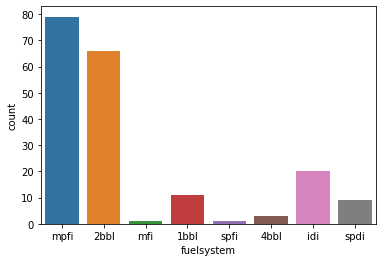

In [18]:
# fuelsystem is categorical attribute and thus we can replace missing values with mode of fuelsystem
print(df.fuelsystem.value_counts())
sns.countplot(df.fuelsystem)
print(df.fuelsystem.mode())


In [19]:
# mode of fuelsystem = "mpfi". thus we replace null values of fuelsystem with mpfi
df.fuelsystem.fillna("mpfi",inplace=True)

In [20]:
df.fuelsystem.isnull().sum()

0

##### Missing values treatment for target variable 'price'

In [21]:
df.price.isnull().value_counts()

False    201
True       3
Name: price, dtype: int64

In [22]:
''' we can't tolerate target variable with null value.
Hence we remove the null values of target variable'''
df = df[df["price"].notna()]

In [23]:
df.price.isnull().sum()


0

#### 2. Remove duplicate or unnecessary Data

In [24]:
# No duplicate/redundant data present in dataset
df.duplicated().sum()

0

In [25]:
print("Unique values of CarName\n\n",df.CarName.unique())  
print("\nUnique value count for CarName = ",df.CarName.nunique())


Unique values of CarName

 ['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 4000' 'audi 5000s (diesel)'
 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4' 'bmw x5'
 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'mazda rx2 coupe' 'mazda rx-4'
 'mazda glc deluxe' 'mazda 626' 'mazda glc' 'mazda rx-7 gs' 'mazda glc 4'
 'mazda glc custom l' 'mazda glc custom' 'buick electra 225 custom'
 'buick century luxus (sw)' 'buick century' 'buick skyhawk'
 'buick opel isuzu deluxe' 'buick s

In [26]:
# There is some inconsistency in the spellings of CarName, which needs to be fixed. 
df['CarName']=df['CarName'].str.split(' ').str.get(0)

In [27]:
df.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'porcshce',
       'renault', 'saab', 'subaru', 'toyota', 'toyouta', 'vokswagen',
       'volkswagen', 'vw', 'volvo'], dtype=object)

In [28]:
df.CarName.nunique()

27

In [29]:
''' when we observe carefully, we can conclude that CarName variable still consist of some 
unnecessary data. We need to do the following replacements:
maxda -> mazda
Nissan -> nissan
porcshce -> porsche
toyouta -> toyota
vokswagen -> volkswagen
vw -> volkswagen'''

# Fixing values in CarName

df.CarName = df.CarName.str.lower()

def replace_name(a,b):
    df.CarName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

df.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [30]:
df.CarName.nunique()

22

### Outlier Detection

#### 1. Outlier Detection for int datatypes variables

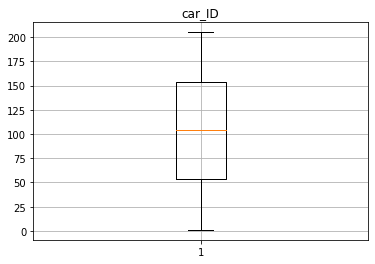

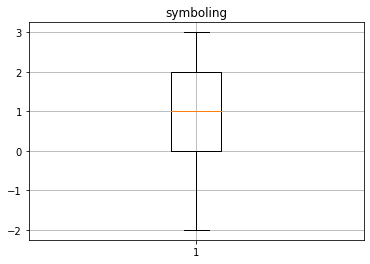

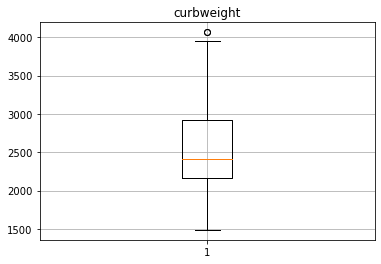

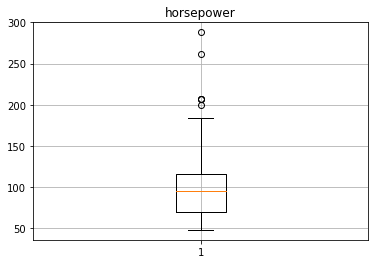

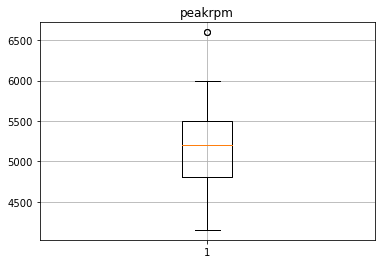

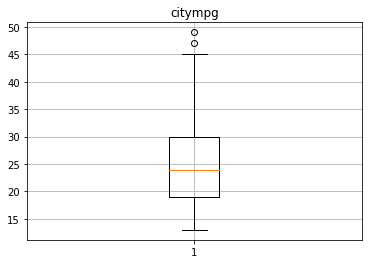

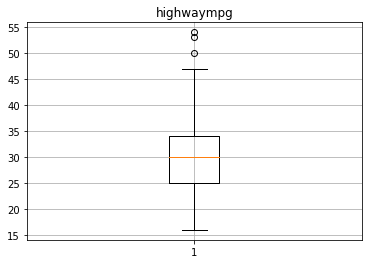

In [31]:

int_col = df.dtypes[df.dtypes=='int64'].index

for col in int_col:
    ax = plt.boxplot( df[col])
    plt.title(f"{col}")
    plt.grid()
    plt.show()

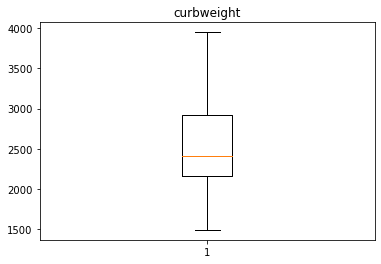

In [32]:
# removal of outlier for curbweight
df_no_outlier=df[df.curbweight<4066]

int_col = ["curbweight"]

for col in int_col:
    df_plot=df_no_outlier[col]
    ax = plt.boxplot(df_plot)
    plt.title(f"{col}")
    plt.show()

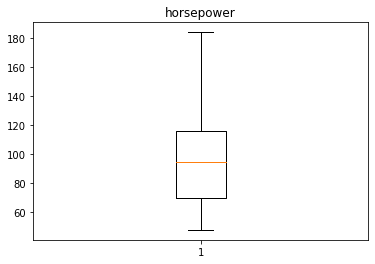

In [33]:
# removal of outlier for horsepower
df_no_outlier=df[df.horsepower<200]

int_col = ["horsepower"]

for col in int_col:
    df_plot=df_no_outlier[col]
    ax = plt.boxplot(df_plot)
    plt.title(f"{col}")
    plt.show()

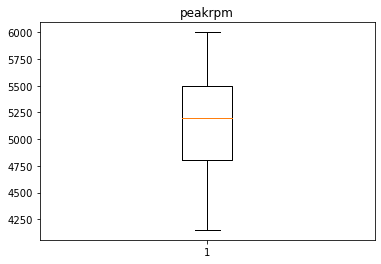

In [34]:
# removal of outlier for peakrpm
df_no_outlier=df[df.peakrpm<6600]

int_col = ["peakrpm"]

for col in int_col:
    df_plot=df_no_outlier[col]
    ax = plt.boxplot(df_plot)
    plt.title(f"{col}")
    plt.show()

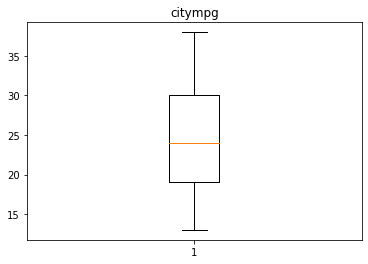

In [35]:
# removal of outlier for citympg
df_no_outlier=df[df.citympg<45]

int_col = ["citympg"]

for col in int_col:
    df_plot=df_no_outlier[col]
    ax = plt.boxplot(df_plot)
    plt.title(f"{col}")
    plt.show()

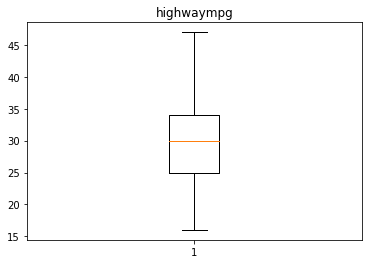

In [36]:
# removal of outlier for highwaympg
df_no_outlier=df[df.highwaympg<50]

int_col = ["highwaympg"]

for col in int_col:
    df_plot=df_no_outlier[col]
    ax = plt.boxplot(df_plot)
    plt.title(f"{col}")
    plt.show()

In [37]:
df_no_int_outlier=df[(df.curbweight<4066) & (df.horsepower<200) & (df.peakrpm<6600) & (df.citympg<45) & (df.highwaympg<50)]

In [38]:
print('maximum value of curbweight = ',df_no_int_outlier.curbweight.max())
print('maximum value of horsepower = ',df_no_int_outlier.horsepower.max())
print('maximum value of highwaympg = ',df_no_int_outlier.highwaympg.max())
print('maximum value of peakrpm    = ',df_no_int_outlier.peakrpm.max())
print('maximum value of citympg    = ',df_no_int_outlier.citympg.max())

maximum value of curbweight =  3900
maximum value of horsepower =  184
maximum value of highwaympg =  47
maximum value of peakrpm    =  6000
maximum value of citympg    =  38


#### 2. Outlier Detection and removal for float datatypes variables

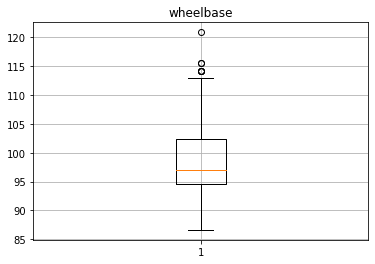

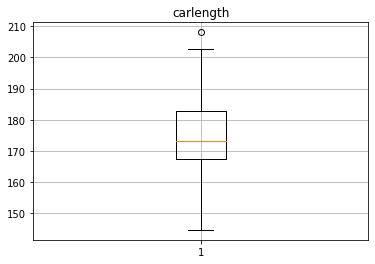

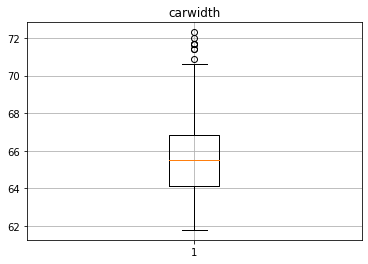

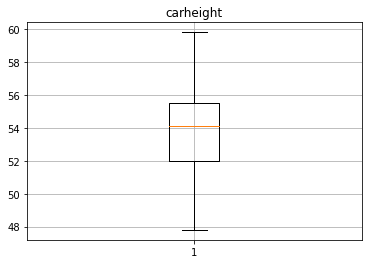

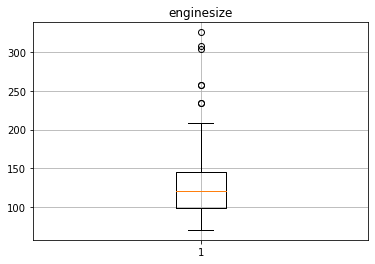

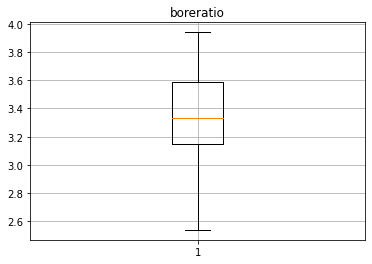

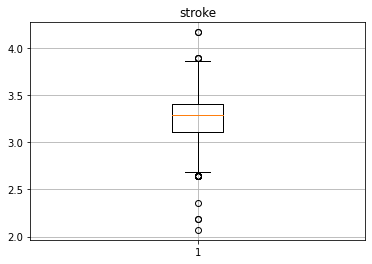

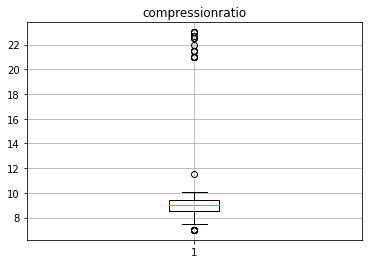

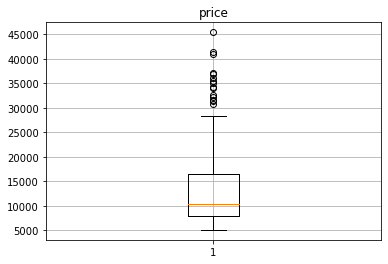

In [39]:
float_col = df_no_outlier.dtypes[df_no_outlier.dtypes==float].index

for col in float_col:
    ax = plt.boxplot( df_no_outlier[col])
    plt.title(f"{col}")
    plt.grid()
    plt.show()

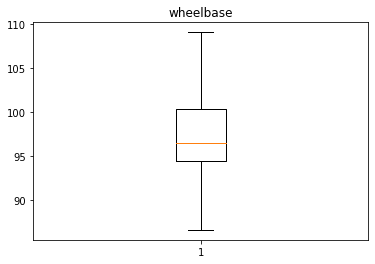

In [40]:
# removal of outlier for wheelbase
df_no_outlier_float=df_no_outlier[df_no_outlier.wheelbase<110]

float_col = ["wheelbase"]

for col in float_col:
    df_plot=df_no_outlier_float[col]
    ax = plt.boxplot(df_plot)
    plt.title(f"{col}")
    plt.show()

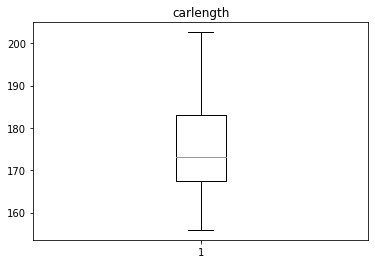

In [41]:
# removal of outlier for carlength
df_no_outlier_float=df_no_outlier[(df_no_outlier.carlength<208) & (df_no_outlier.carlength>150)]

float_col = ["carlength"]

for col in float_col:
    df_plot=df_no_outlier_float[col]
    ax = plt.boxplot(df_plot)
    plt.title(f"{col}")
    plt.show()

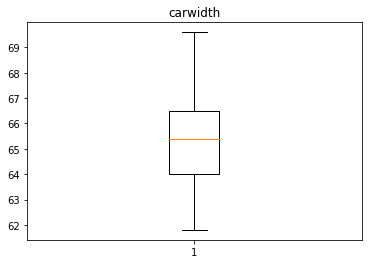

In [42]:
# removal of outlier for carwidth
df_no_outlier_float=df_no_outlier[df_no_outlier.carwidth<70]

float_col = ["carwidth"]

for col in float_col:
    df_plot=df_no_outlier_float[col]
    ax = plt.boxplot(df_plot)
    plt.title(f"{col}")
    plt.show()

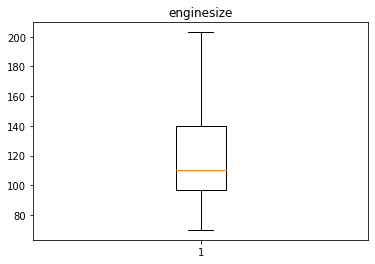

In [43]:
# removal of outlier for enginesize
df_no_outlier_float=df_no_outlier[df_no_outlier.enginesize<209]

float_col = ["enginesize"]

for col in float_col:
    df_plot=df_no_outlier_float[col]
    ax = plt.boxplot(df_plot)
    plt.title(f"{col}")
    plt.show()

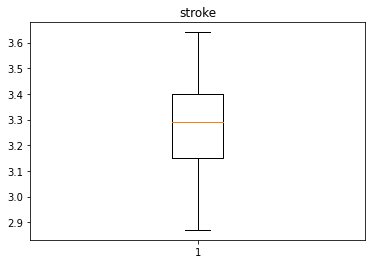

In [44]:
# removal of outlier for stroke
df_no_outlier_float=df_no_outlier[(df_no_outlier.stroke<3.85) & (df_no_outlier.stroke>2.8)]

float_col = ["stroke"]

for col in float_col:
    df_plot=df_no_outlier_float[col]
    ax = plt.boxplot(df_plot)
    plt.title(f"{col}")
    plt.show()

In [45]:
# removal of outlier for compressionratio
df_no_outlier_float=df_no_outlier[(df_no_outlier.compressionratio<11) & (df_no_outlier.compressionratio>8)]

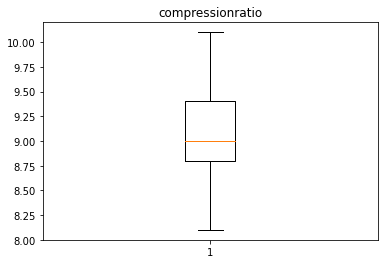

In [46]:
float_col = ["compressionratio"]

for col in float_col:
    df_plot=df_no_outlier_float[col]
    ax = plt.boxplot(df_plot)
    plt.title(f"{col}")
    plt.show()

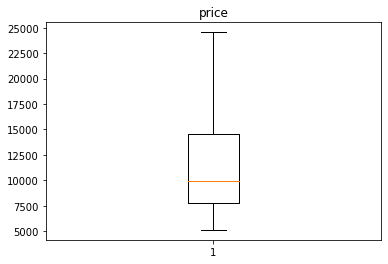

In [47]:
# removal of outlier for price
df_no_outlier_float=df_no_outlier[(df_no_outlier.price<25500)]
float_col = ["price"]

for col in float_col:
    df_plot=df_no_outlier_float[col]
    ax = plt.boxplot(df_plot)
    plt.title(f"{col}")
    plt.show()

### Feature Encoding

In [56]:
cat_col = df.dtypes[df.dtypes==object].index

for col in cat_col:
    print(df[col].value_counts())
    print("==================================")

toyota         32
nissan         18
mazda          15
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          10
dodge           9
buick           8
bmw             8
plymouth        7
audi            6
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: CarName, dtype: int64
gas       182
diesel     19
Name: fueltype, dtype: int64
std      165
turbo     36
Name: aspiration, dtype: int64
four    113
two      88
Name: doornumber, dtype: int64
sedan          95
hatchback      68
wagon          24
hardtop         8
convertible     6
Name: carbody, dtype: int64
fwd    117
rwd     75
4wd      9
Name: drivewheel, dtype: int64
front    198
rear       3
Name: enginelocation, dtype: int64
ohc      144
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64
four      157
six        23
five       10
